In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
plt.style.use('tableau-colorblind10')

In [5]:
sale=pd.read_csv('Sales-products.csv')

In [6]:
sale.head()

,SaleID,RetailerCountry,OrderMethod,RetailerType,ProductLine,ProductType,Product,Year,Quarter,Revenue,Quantity,GrossMargin
0,SaleID_1,United States,Fax,Outdoors Shop,Personal Accessories,Cooking Gear,TrailChef Deluxe Cook Set,2018.0,Q1 2018,59728.66,491.0,0.357548
1,SaleID_2,United States,Fax,Outdoors Shop,Sports Equipment,Cooking Gear,TrailChef Double Flame,2018.0,Q1 2018,36050.32,254.0,0.484274
2,SaleID_3,United States,Fax,Outdoors Shop,NaN,Tents,Star Dome,2018.0,Q1 2018,90040.48,149.0,NaN
3,SaleID_4,United States,Fax,Outdoors Shop,NaN,Tents,Star Gazer 2,2018.0,Q1 2018,NaN,305.0,0.292938
4,SaleID_5,United States,NaN,Outdoors Shop,Personal Accessories,First Aid,Compact Relief Kit,2018.0,Q1 2018,NaN,182.0,0.610710


In [7]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SaleID           1276 non-null   object 
 1   RetailerCountry  1276 non-null   object 
 2   OrderMethod      1271 non-null   object 
 3   RetailerType     1273 non-null   object 
 4   ProductLine      1273 non-null   object 
 5   ProductType      1273 non-null   object 
 6   Product          1272 non-null   object 
 7   Year             1275 non-null   float64
 8   Quarter          1276 non-null   object 
 9   Revenue          1260 non-null   float64
 10  Quantity         1273 non-null   float64
 11  GrossMargin      1250 non-null   float64
dtypes: float64(4), object(8)
memory usage: 119.8+ KB


In [8]:
sale.isnull().sum()

SaleID              0
RetailerCountry     0
OrderMethod         5
RetailerType        3
ProductLine         3
ProductType         3
Product             4
Year                1
Quarter             0
Revenue            16
Quantity            3
GrossMargin        26
dtype: int64

In [9]:
sale['OrderMethod']=sale['OrderMethod'].fillna('Not Specified')

In [10]:
sale['RetailerType']=sale['RetailerType'].fillna('Not Specified')

In [11]:
sale['ProductLine']=sale['ProductLine'].fillna('Not Secified')

In [12]:
sale['ProductType']=sale['ProductType'].fillna('Not Specified')

In [13]:
sale['Product']=sale['Product'].fillna('Not Specified')

In [14]:
sale['Year'].value_counts()

Year
2018.0    902
2019.0    201
2020.0    172
Name: count, dtype: int64

In [15]:
sale['Year']=sale['Year'].fillna(2018.0)

In [16]:
sale['Year']=sale['Year'].astype(int)

In [17]:
qty_avg=sale['Quantity'].mean()

In [18]:
rev_avg=sale['Revenue'].mean()
grs_avg=sale['GrossMargin'].mean()

In [19]:
sale['Quantity']=sale['Quantity'].fillna(qty_avg)
sale['Revenue']=sale['Revenue'].fillna(rev_avg)
sale['GrossMargin']=sale['GrossMargin'].fillna(grs_avg)

In [20]:
sale.isnull().sum()

SaleID             0
RetailerCountry    0
OrderMethod        0
RetailerType       0
ProductLine        0
ProductType        0
Product            0
Year               0
Quarter            0
Revenue            0
Quantity           0
GrossMargin        0
dtype: int64

In [21]:
sale.head()

,SaleID,RetailerCountry,OrderMethod,RetailerType,ProductLine,ProductType,Product,Year,Quarter,Revenue,Quantity,GrossMargin
0,SaleID_1,United States,Fax,Outdoors Shop,Personal Accessories,Cooking Gear,TrailChef Deluxe Cook Set,2018,Q1 2018,59728.660000,491.0,0.357548
1,SaleID_2,United States,Fax,Outdoors Shop,Sports Equipment,Cooking Gear,TrailChef Double Flame,2018,Q1 2018,36050.320000,254.0,0.484274
2,SaleID_3,United States,Fax,Outdoors Shop,Not Secified,Tents,Star Dome,2018,Q1 2018,90040.480000,149.0,0.459638
3,SaleID_4,United States,Fax,Outdoors Shop,Not Secified,Tents,Star Gazer 2,2018,Q1 2018,31416.916794,305.0,0.292938
4,SaleID_5,United States,Not Specified,Outdoors Shop,Personal Accessories,First Aid,Compact Relief Kit,2018,Q1 2018,31416.916794,182.0,0.610710


In [22]:
sale['Revenue'] = sale['Revenue'].round(2)

In [23]:
pivot1=sale.pivot_table(index='OrderMethod',values=['Revenue','Quantity'],aggfunc='sum')
pivot1

,Quantity,Revenue
OrderMethod,,
E-mail,74350.000000,2851584.26
Fax,75361.000000,4909345.07
Mail,30032.000000,2002473.65
Not Specified,1094.000000,152137.64
Other,40036.000000,1874375.41
Phone,124751.000000,7448203.02
Sales visit,159128.000000,5904653.45
Web,261686.972506,14945213.38


In [24]:
sale['Quantity']=sale['Quantity'].astype(int)

In [25]:
X=pivot1.index
Y=pivot1['Revenue'].values
Z=pivot1['Quantity'].values

In [26]:
X

Index(['E-mail', 'Fax', 'Mail', 'Not Specified', 'Other', 'Phone',
       'Sales visit', 'Web'],
      dtype='object', name='OrderMethod')

In [27]:
Y

array([ 2851584.26,  4909345.07,  2002473.65,   152137.64,  1874375.41,
        7448203.02,  5904653.45, 14945213.38])

In [28]:
A = sale.groupby('ProductLine')['Revenue'].mean()
B = sale.groupby('ProductLine')['Revenue'].sum()


In [29]:
C = sale.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(5)

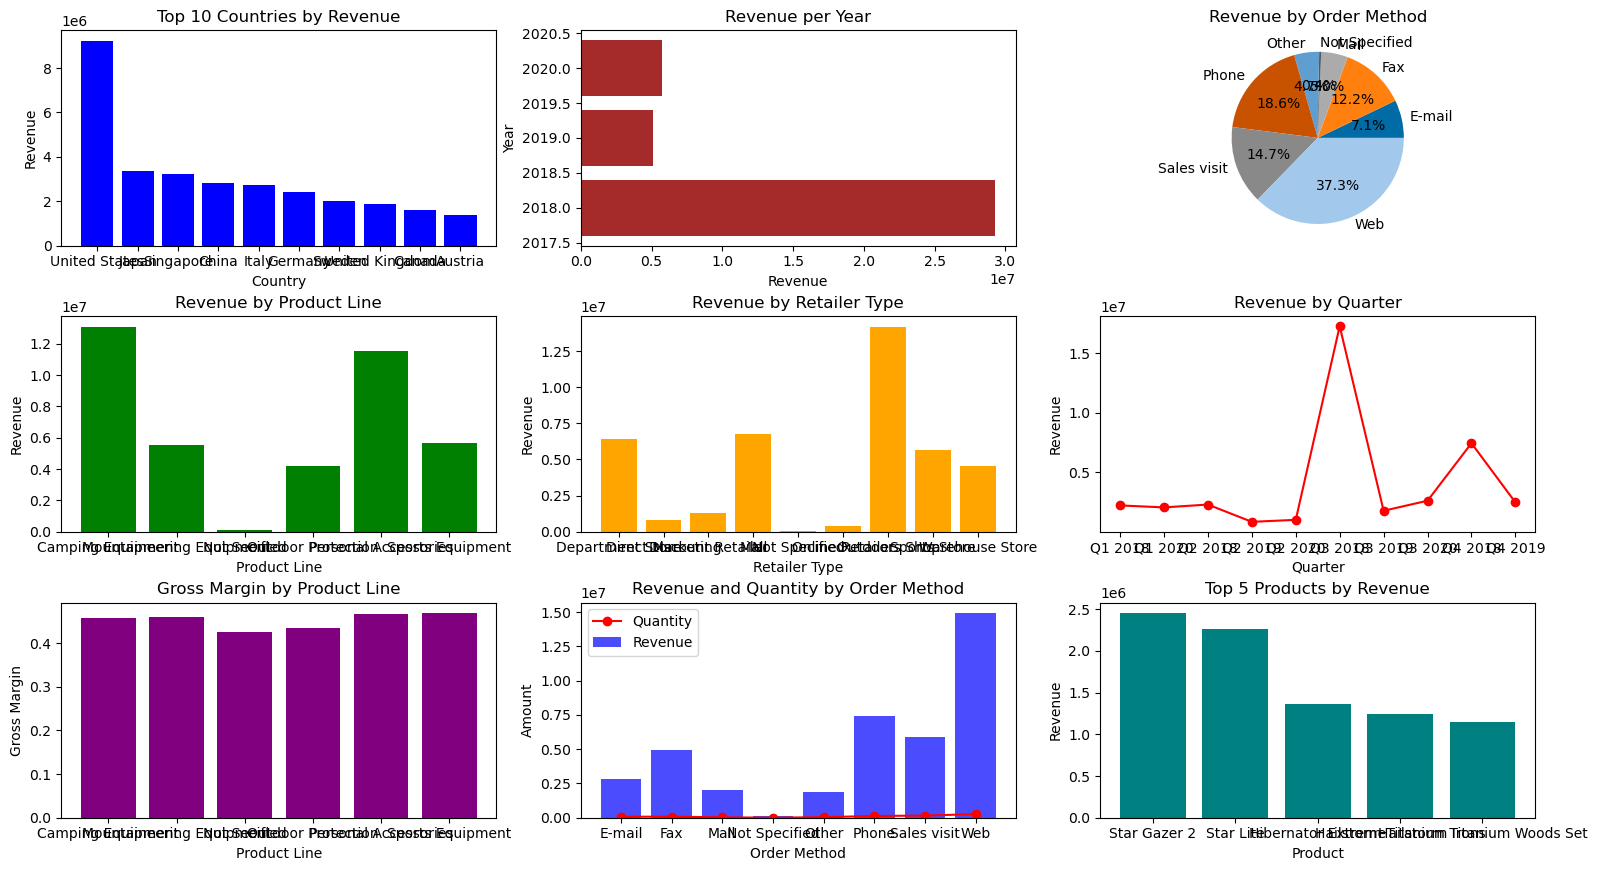

In [30]:
country_rev = sale.groupby('RetailerCountry')['Revenue'].sum().sort_values(ascending=False).head(10)
year_rev = sale.groupby('Year')['Revenue'].sum()
method_rev = sale.groupby('OrderMethod')['Revenue'].sum()
product_rev = sale.groupby('ProductLine')['Revenue'].sum()
retailer_rev = sale.groupby('RetailerType')['Revenue'].sum()
quarter_rev = sale.groupby('Quarter')['Revenue'].sum()
product_margin = sale.groupby('ProductLine')['GrossMargin'].mean()
method_data = sale.groupby('OrderMethod').agg({'Revenue':'sum', 'Quantity':'sum'})
top_products = sale.groupby('Product')['Revenue'].sum().nlargest(5)

fig,ax=plt.subplots(3,3,figsize=(16,9))
plt.tight_layout(pad=3)

ax[0,0].bar(country_rev.index, country_rev.values, color='blue')
ax[0,0].set(title='Top 10 Countries by Revenue', xlabel='Country', ylabel='Revenue')

ax[0,1].barh(year_rev.index, year_rev.values, color='brown')
ax[0,1].set(title='Revenue per Year', xlabel='Revenue', ylabel='Year')

ax[0,2].pie(method_rev.values, labels=method_rev.index, autopct='%1.1f%%')
ax[0,2].set(title='Revenue by Order Method')

ax[1,0].bar(product_rev.index, product_rev.values, color='green')
ax[1,0].set(title='Revenue by Product Line', xlabel='Product Line', ylabel='Revenue')

ax[1,1].bar(retailer_rev.index, retailer_rev.values, color='orange')
ax[1,1].set(title='Revenue by Retailer Type', xlabel='Retailer Type', ylabel='Revenue')

ax[1,2].plot(quarter_rev.index, quarter_rev.values, color='red', marker='o')
ax[1,2].set(title='Revenue by Quarter', xlabel='Quarter', ylabel='Revenue')

ax[2,0].bar(product_margin.index, product_margin.values, color='purple')
ax[2,0].set(title='Gross Margin by Product Line', xlabel='Product Line', ylabel='Gross Margin')

ax[2,1].bar(method_data.index, method_data['Revenue'], color='blue', alpha=0.7, label='Revenue')
ax[2,1].plot(method_data.index, method_data['Quantity'], color='red', marker='o', label='Quantity')
ax[2,1].set(title='Revenue and Quantity by Order Method', xlabel='Order Method', ylabel='Amount')
ax[2,1].legend()

ax[2,2].bar(top_products.index, top_products.values, color='teal')
ax[2,2].set(title='Top 5 Products by Revenue', xlabel='Product', ylabel='Revenue')

plt.show()